<a href="https://colab.research.google.com/github/karishma20052000/Nm_ph5/blob/main/nm_phase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AI-EBPL: Energy Efficiency Optimization - Google Colab Notebook
# Phase 1 & 2 Integration (Simulation)
# Team: Group 3 – Naan Mudhalvan Phase 1 & 2
# Description: This notebook simulates IoT sensor data and uses AI (Linear Regression) to predict energy output from waste-to-energy conversion.

In [ ]:
# Install necessary libraries
!pip install -q numpy pandas matplotlib seaborn scikit-learn plotly


In [ ]:
# Import Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px


In [ ]:
# Simulate sensor data for waste-to-energy plant
np.random.seed(42)
n = 500
data = pd.DataFrame({
    'temperature': np.random.normal(800, 50, n),  # Reactor temperature (°C)
    'pressure': np.random.normal(5, 0.5, n),      # Pressure in atm
    'flow_rate': np.random.normal(20, 3, n),      # Syngas flow rate (m³/hr)
    'waste_input': np.random.normal(100, 15, n)   # Waste input (kg/hr)
})

# Simulate energy output (dependent variable)
data['energy_output'] = (data['waste_input'] * 0.4) + (data['temperature'] * 0.1) - (data['pressure'] * 2) + np.random.normal(0, 10, n)

# Show first few rows
data.head()


,temperature,pressure,flow_rate,waste_input,energy_output
0,824.835708,5.463089,24.198066,111.675416,109.475777
1,793.086785,5.954708,22.773901,91.732214,102.646961
2,832.384427,4.300716,20.178891,87.727017,101.803618
3,876.151493,5.281485,18.059190,99.949383,113.952318
4,788.292331,4.674679,22.094670,97.447231,89.522621


from matplotlib import pyplot as plt
_df_0['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['flow_rate'].plot(kind='hist', bins=20, title='flow_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['waste_input'].plot(kind='hist', bins=20, title='waste_input')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='temperature', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pressure', y='flow_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='flow_rate', y='waste_input', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='waste_input', y='energy_output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['flow_rate'].plot(kind='line', figsize=(8, 4), title='flow_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['waste_input'].plot(kind='line', figsize=(8, 4), title='waste_input')
plt.gca().spines[['top', 'right']].set_visible(False)

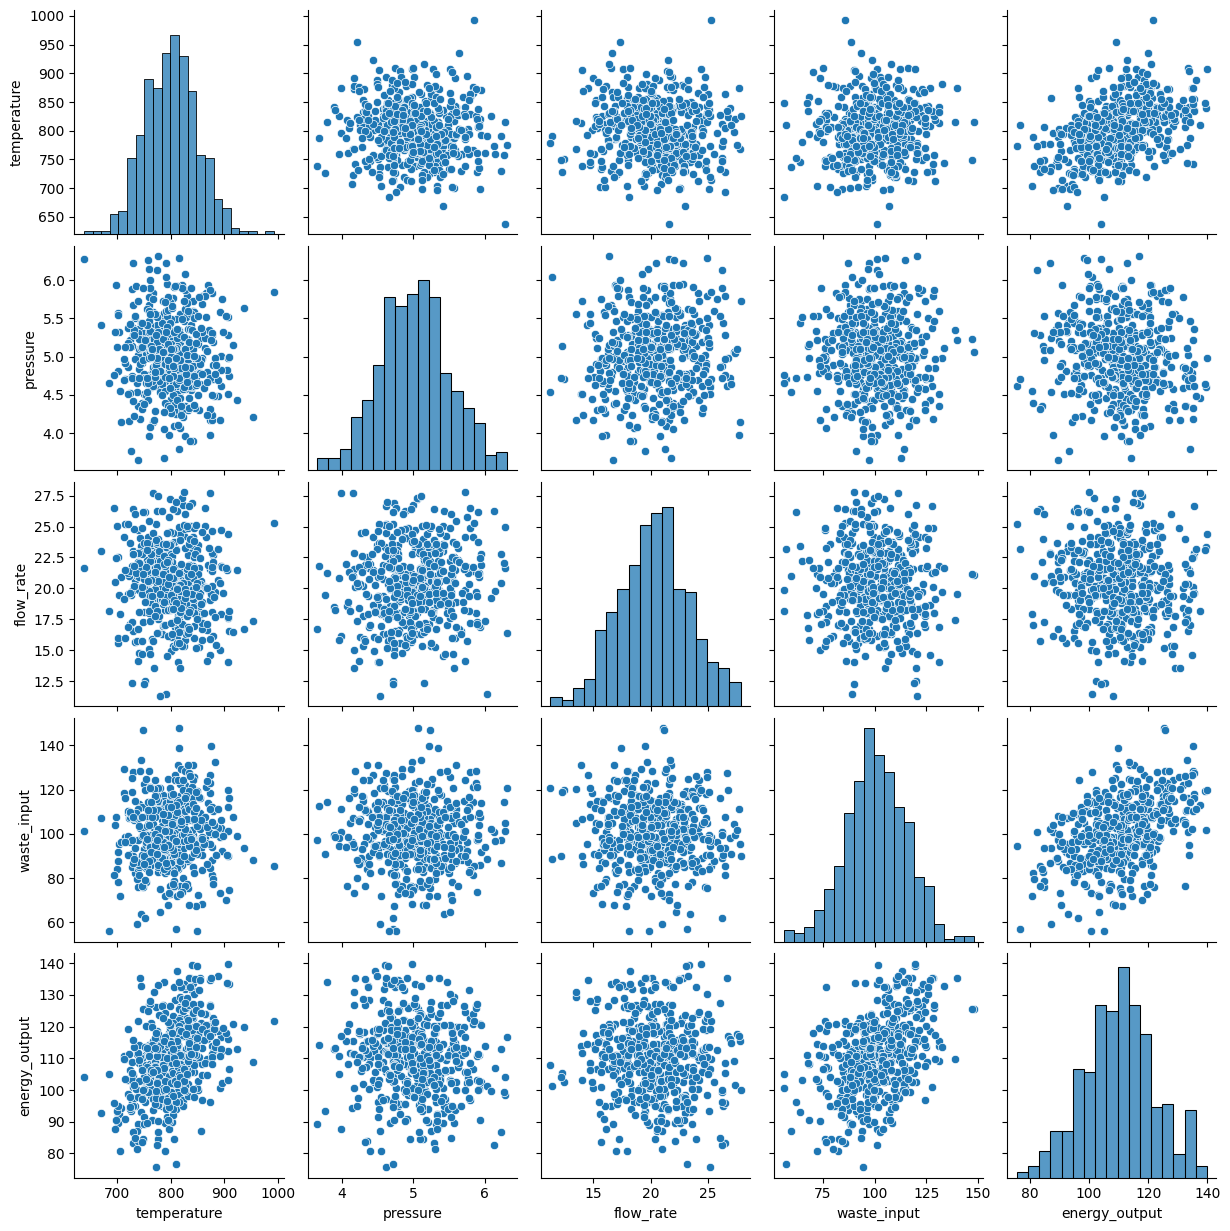

In [ ]:
# Visualize feature relationships
sns.pairplot(data)
plt.show()


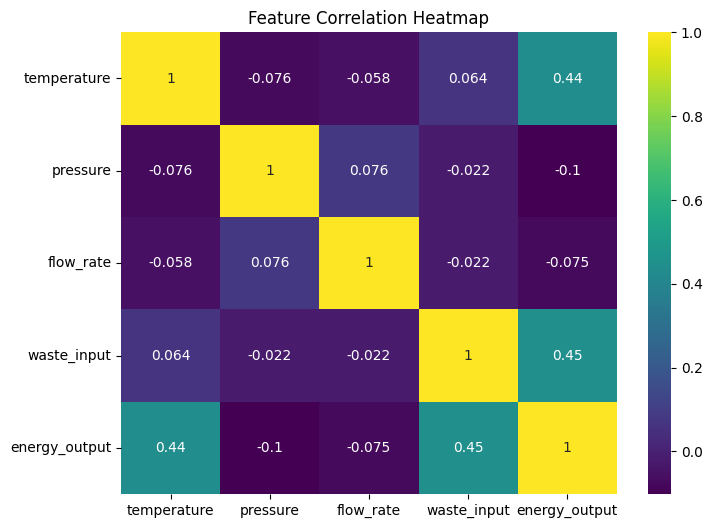

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Train-test split
X = data[['temperature', 'pressure', 'flow_rate', 'waste_input']]
y = data['energy_output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

# Output evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")


Mean Squared Error: 84.13
Model Coefficients:
temperature: 0.095
pressure: -1.019
flow_rate: -0.142
waste_input: 0.333


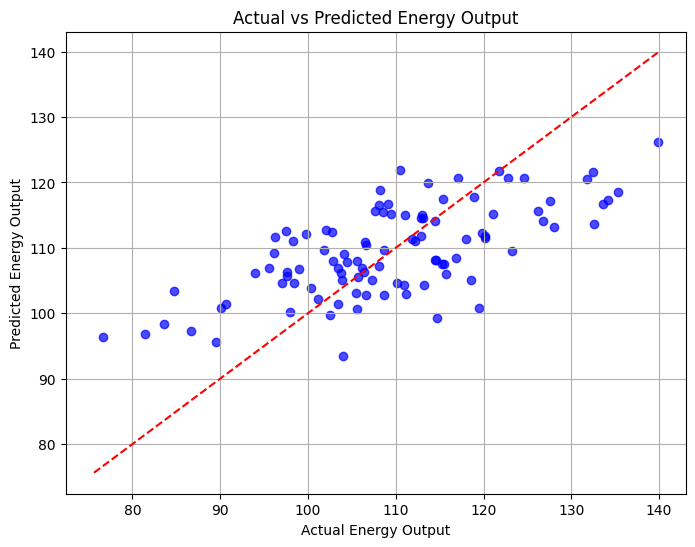

In [ ]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Actual vs Predicted Energy Output")
plt.grid(True)
plt.show()


In [ ]:
# 3D visualization using Plotly
fig = px.scatter_3d(data, x='temperature', y='waste_input', z='energy_output',
                    color='flow_rate', title='3D Visualization of Energy Output')
fig.show()
